In [478]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Step 1. Load dataset

We use pandas to import our traning and test datasets, then we'll try to understand the data. 

In [479]:
train = pd.read_csv("input/train.csv")
test = pd.read_csv("input/test.csv")

print('Train shape:',train.shape)
print('Test shape:', test.shape)

Train shape: (891, 12)
Test shape: (418, 11)


In [480]:
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [481]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Data Dictionary 

 * Rows and columns :  We can see that there are 891 rows and 12 columns in our training set. Test set contains 418 rows and 11 columns.
   
| Variable    | Definition                             | Key                                         |
|-------------|----------------------------------------|---------------------------------------------|
| survival    | Survival                               | 0 = No, 1 = Yes                             |
| pclass      | Ticket class                           | 1 = 1st, 2 = 2nd, 3 = 3rd                   |
| sex         | Sex                                    |                                             |
| Age         | Age in years                           |                                             |
| sibsp       | # of siblings / spouses aboard the Titanic |                                             |
| parch       | # of parents / children aboard the Titanic |                                             |
| ticket      | Ticket number                          |                                             |
| fare        | Passenger fare                         |                                             |
| cabin       | Cabin number                           |                                             |
| embarked    | Port of Embarkation                    





## Step 2. Feature engineering and data preproccessing

Now we'll try to analyze the input to see if we need some preprocessing steps in our data:

* Descriptive Statistics. Use `train.describe()` to see the statistical properties of the data
* Handle missing values. Find missing values using `train.isnull().sum`. 
* Encode categorical variables. We use `train['column_name'].map()` function to map a categorical features to numeric.
* Remove unneccesary columns.
* Scale numerical features

In [482]:
# Descriptive statistics
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [483]:
# Handle missing values, train set
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We can see that Age values is missing for 177 rows from training set, Cabin values are also missing in many rows, 687 and 2 rows missing Embarked information.

#### Bar chart for categorical features
* Sex
* Embarked
* PClass
* SibSp
* Parch( # of parents and children)

In [484]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

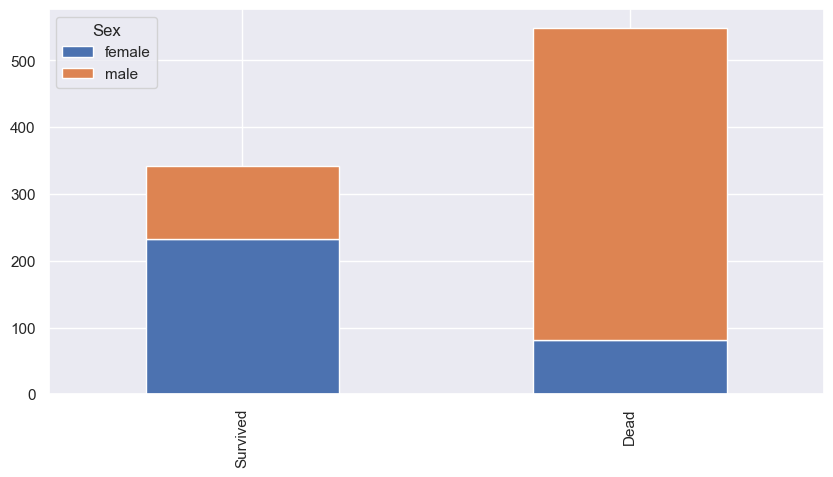

In [485]:
bar_chart('Sex')

The Chart confirms **Women** more likely survivied than **Men**

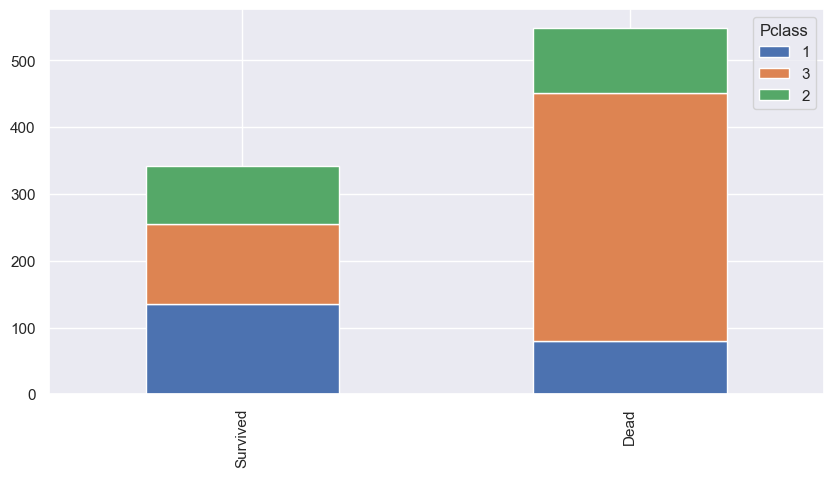

In [486]:
bar_chart('Pclass')

The Chart confirms **1st class** more likely survivied than other classes

The Chart confirms **3rd class** more likely dead than other classes

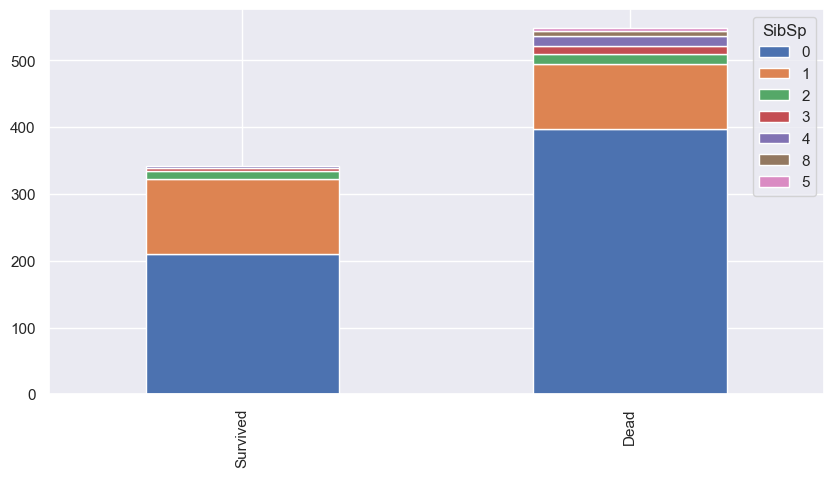

In [487]:
bar_chart('SibSp')

The Chart confirms a person aboarded with **more than 2 siblings or spouse** more likely survived

The Chart confirms **a person aboarded without siblings or spouse** more likely dead

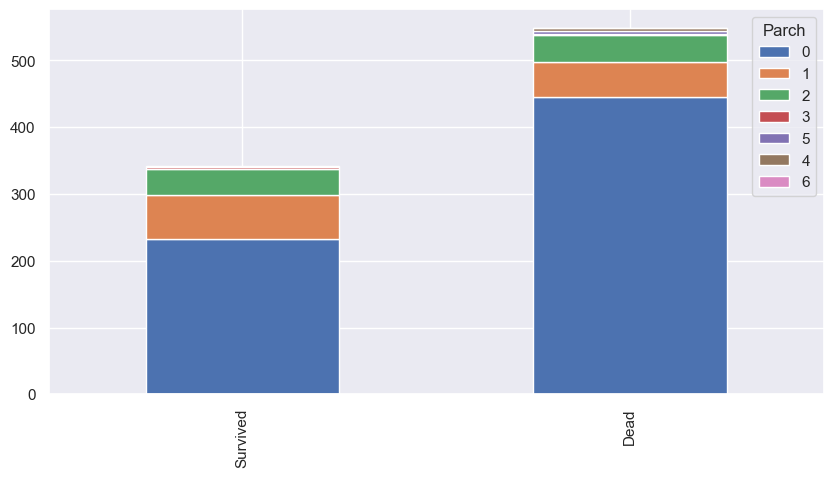

In [488]:
bar_chart('Parch')

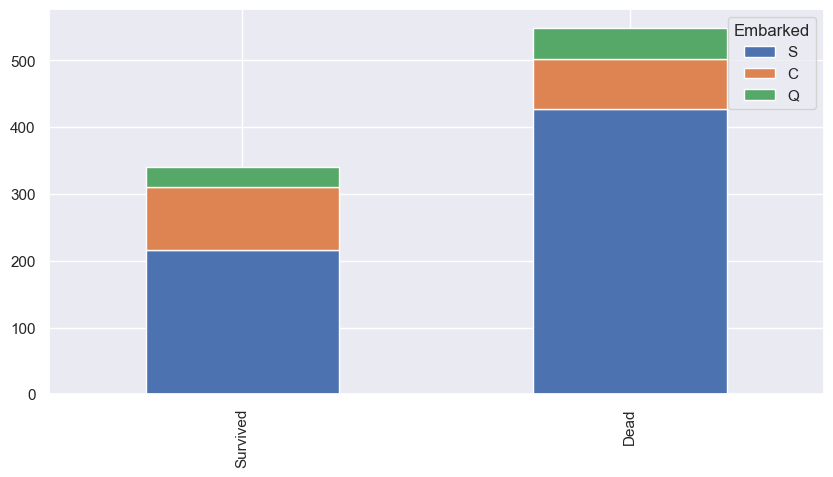

In [489]:
bar_chart('Embarked')

The Chart confirms a person aboarded from **C** slightly more likely survived

The Chart confirms a person aboarded from **Q** more likely dead

The Chart confirms a person aboarded from **S** more likely dead

#### Handle missing values 

In [490]:
# Combine train and test dataset
train_test = [train,test]

for data in train_test:
    data['Title'] = data['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False) #extract title from name


In [491]:
# Map categorical features to numbers

sex_mapping = {"male": 0, "female": 1}
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }

for data in train_test:
    data['Sex'] = data['Sex'].map(sex_mapping)
    data['Title'] = data['Title'].map(title_mapping)

In [492]:
# Median imputation for 'Age' adn 'Fare'. Fill missing 'Embarked' values with 'S' value.
train['Age'] = train['Age'].fillna(train.groupby(['Title','Pclass'])['Age'].transform('median'))
test['Age'] = test['Age'].fillna(test.groupby(['Title', 'Pclass'])['Age'].transform('median'))

train['Fare'] = train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"))
test['Fare'] = test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"))

train['Embarked'] = train['Embarked'].fillna('S')
test['Embarked'] = test['Embarked'].fillna('S')

In [493]:
#Map categorical feature 'Embarke'
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
for data in train_test:
    data['Embarked'] = data['Embarked'].map(embarked_mapping)

In [494]:
#Remove 'Cabin' column, too many missing values
train.drop(columns=['Cabin', 'Name'], inplace = True)
test.drop(columns=['Cabin', 'Name'], inplace = True)


In [495]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,0,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,1,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,0,1
3,4,1,1,1,35.0,1,0,113803,53.1000,0,2
4,5,0,3,0,35.0,0,0,373450,8.0500,0,0


#### Scale numerical features

In [496]:
scaler = StandardScaler()
train['Fare'] = scaler.fit_transform(train[['Fare']])
test['Fare']  = scaler.fit_transform(test[['Fare']])
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,-0.502445,0,0
1,2,1,1,1,38.0,1,0,PC 17599,0.786845,1,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,-0.488854,0,1
3,4,1,1,1,35.0,1,0,113803,0.420730,0,2
4,5,0,3,0,35.0,0,0,373450,-0.486337,0,0


#### Feature engineering

Feature engineering is the process of using domain knowledge to create new features or transform existing features in a dataset to improve the performance of a machine learning model. For the Titanic dataset, which is often used for binary classification (predicting survival or not), feature engineering can significantly impact model performance.

In [497]:
# Create new feature 'Family_size'
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

## Family mapping
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for data in train_test:
    data['FamilySize'] = data['FamilySize'].map(family_mapping)

In [498]:
# Remove unneccesary columns
train.drop(columns=['PassengerId','SibSp', 'Parch','Ticket'], inplace=True)
test.drop(columns=['SibSp', 'Parch','Ticket'], inplace=True )

### Step 4. Data visualization 

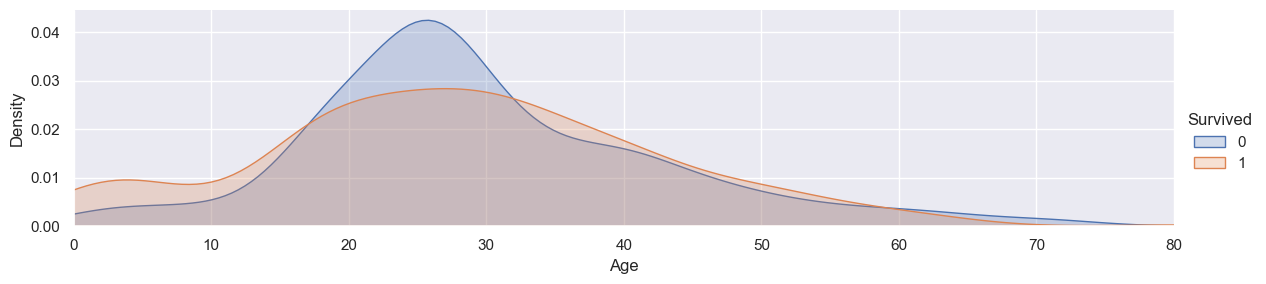

In [499]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',fill= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
 
plt.show() 

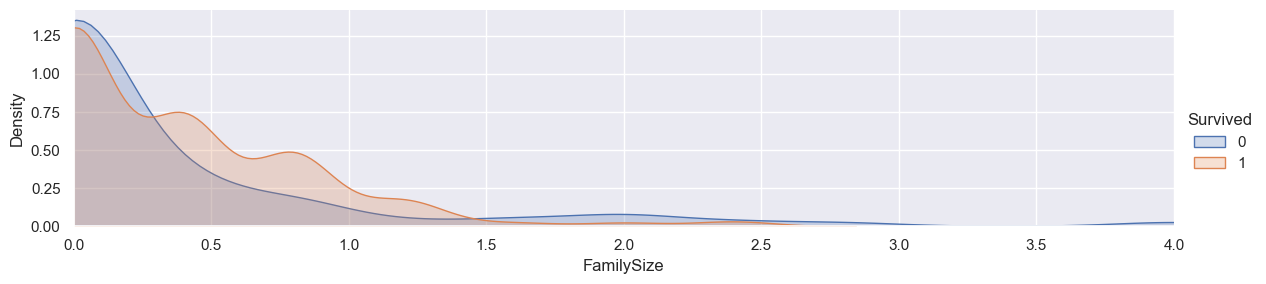

In [500]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilySize',fill= True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()
 
plt.show() 

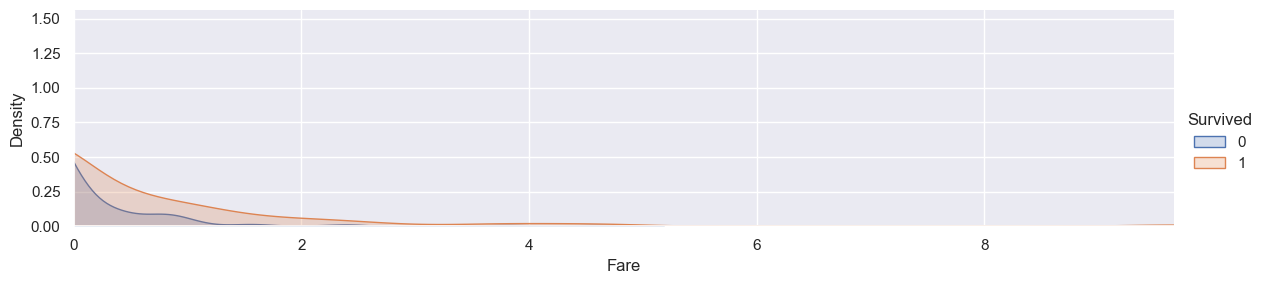

In [501]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',fill= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
 
plt.show() 

### Step 5. Prepare dataset for modeling

For a better evaluation of the model we'll create 3 datasets: for training, cross validation and test.

In [502]:
# Prepare dataset for modeling

X_train = train.drop('Survived', axis=1)
y_train = train['Survived']

X_train.head()

,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,3,0,22.0,-0.502445,0,0,0.4
1,1,1,38.0,0.786845,1,2,0.4
2,3,1,26.0,-0.488854,0,1,0.0
3,1,1,35.0,0.420730,0,2,0.4
4,3,0,35.0,-0.486337,0,0,0.0


In [503]:
X_train.shape, y_train.shape

((891, 7), (891,))

### Step 6. Moddeling

* Import libraries
* Cross validation
* Decision Tree Model
* Random Forest Model
* Evaluate each model

In [504]:
# Importing Classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [505]:
## Import K-Fold Cross-Validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

#### Random Forest Algorithm

In [523]:
clf = RandomForestClassifier(n_estimators = 13)
scoring = 'accuracy'
score = cross_val_score(clf, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.83333333 0.86516854 0.75280899 0.82022472 0.85393258 0.86516854
 0.87640449 0.82022472 0.80898876 0.82022472]


In [524]:
# Evaluate Random Forest: Score
round(np.mean(score)*100, 2)

83.16

#### Decision Tree Algorithm 

In [525]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.74444444 0.83146067 0.69662921 0.74157303 0.73033708 0.78651685
 0.73033708 0.71910112 0.71910112 0.74157303]


In [526]:
# Evaluate Decision Tree: Score
round(np.mean(score)*100, 2)

74.41

### Step 7. Testing

In [527]:
clf = RandomForestClassifier(n_estimators = 13)
clf.fit(X_train, y_train)

test_data = test.drop('PassengerId', axis=1)
prediction = clf.predict(test_data)

In [528]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })

submission.to_csv('submission.csv', index=False)

In [529]:
submission = pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
